In [25]:
!pip install tensorflow

In [26]:
!pip install opencv-python matplotlib numpy

In [27]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import InputLayer, Convolution2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from tensorflow.python.keras.utils import np_utils
import itertools

In [28]:
print("oh")

oh


In [29]:
import os
image_path = 'AppleNoise.png'  
folder_path = '/Users/kemkaihemelandu/Documents/fruitData'
save_path = '/Users/kemkaihemelandu/Documents/processed'
os.makedirs(save_path, exist_ok=True)

def apply_clahe(image):
    image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(image_uint8)
    return clahe_img

# Morphological cleaning function
def morphological_cleaning(image):
    kernel = np.ones((3,3), np.uint8)
    opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    return closed


def preprocess_image(image_path):
    img = cv2.imread(image_path)
    
    # Step 1: Denoising
    denoised = cv2.GaussianBlur(img, (5, 5), 0)

    # Step 2: Grayscale
    gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)

    # Step 3: Background subtraction
    background = cv2.GaussianBlur(gray, (51, 51), 0)
    background_subtracted = gray - background
    background_subtracted = np.clip(background_subtracted, 0, 255).astype(np.uint8)

    clahe_applied = apply_clahe(background_subtracted)

    # Step 5: Morphological Opening/Closing
    morph_cleaned = morphological_cleaning(clahe_applied)


    # Step 4: Normalize
    normalized = background_subtracted / 255.0

    return img, denoised, background_subtracted, clahe_applied, morph_cleaned, normalized

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.png', '.jpeg', '.tif')):  # adjust extensions if needed
        image_path = os.path.join(folder_path, filename)
        original, denoised, background_subtracted, clahe_applied, morph_cleaned, normalized = preprocess_image(image_path)

        # Save processed image as .png (multiply by 255 to convert back to 8-bit)
        save_file = os.path.join(save_path, filename)
        cv2.imwrite(save_file, (normalized * 255).astype(np.uint8))

print("✅ All images processed and saved!")

✅ All images processed and saved!


In [30]:
print("oh")

oh


In [31]:
def visualize_pipeline(original, denoised, background_subtracted, clahe_applied, morph_cleaned):
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2,3,1); plt.imshow(original_rgb); plt.title("Original"); plt.axis('off')
    plt.subplot(2,3,2); plt.imshow(denoised); plt.title("Denoised"); plt.axis('off')
    plt.subplot(2,3,3); plt.imshow(background_subtracted, cmap='gray'); plt.title("Background Subtracted"); plt.axis('off')
    plt.subplot(2,3,4); plt.imshow(clahe_applied, cmap='gray'); plt.title("CLAHE"); plt.axis('off')
    plt.subplot(2,3,5); plt.imshow(morph_cleaned, cmap='gray'); plt.title("Morph Cleaned"); plt.axis('off')
    
    plt.tight_layout()
    plt.show()

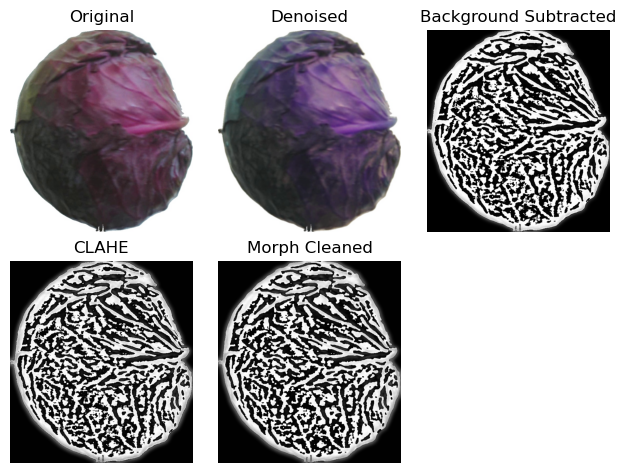

In [32]:


original, denoised, background_subtracted, clahe_applied, morph_cleaned, normalized = preprocess_image(image_path)

visualize_pipeline(original, denoised, background_subtracted, clahe_applied, morph_cleaned)